TCS DATASET TASKS

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df=pd.read_csv('Retail_Transactions_2000.csv')
df

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418


In [106]:
df.size

22000

In [107]:
df.describe()

,Age,Quantity,Price,TotalAmount
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,44.679000,2.957000,2496.61000,7307.414500
std,15.179795,1.412143,1413.95187,5705.065758
min,18.000000,1.000000,100.00000,111.000000
25%,32.000000,2.000000,1239.00000,2756.250000
50%,45.000000,3.000000,2481.50000,5562.500000
75%,58.000000,4.000000,3695.50000,10751.250000
max,70.000000,5.000000,5000.00000,24950.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [109]:
df.shape

(2000, 11)

In [110]:
df.columns.tolist()

['TransactionID',
 'CustomerID',
 'Gender',
 'Age',
 'City',
 'ProductCategory',
 'Quantity',
 'Price',
 'PurchaseDate',
 'PaymentMode',
 'TotalAmount']

In [111]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [112]:
df.duplicated().sum()

np.int64(0)

In [113]:
print(((df['Age']<=0) | (df['Price']<=0) | (df['Quantity']<=0) | (df['TotalAmount']<=0)).sum())

0


In [114]:
for i in ['Age','Quantity','Price','TotalAmount']:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  print(f'{i}: {outlier} outliers')

Age: 0 outliers
Quantity: 0 outliers
Price: 0 outliers
TotalAmount: 26 outliers


In [115]:
df['Gender'].value_counts()

Gender
Male      673
Female    664
Other     663
Name: count, dtype: int64

In [116]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'],errors='coerce')
df['Year']=df['PurchaseDate'].dt.year
df['Month']=df['PurchaseDate'].dt.month
df['Date']=df['PurchaseDate'].dt.day_name()

In [117]:
df.head(5)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,Month,Date
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,3,Wednesday
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,1,Sunday
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,4,Tuesday
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,8,Wednesday
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,9,Saturday


In [118]:
df.dtypes

TransactionID              object
CustomerID                 object
Gender                     object
Age                         int64
City                       object
ProductCategory            object
Quantity                    int64
Price                       int64
PurchaseDate       datetime64[ns]
PaymentMode                object
TotalAmount                 int64
Year                        int32
Month                       int32
Date                       object
dtype: object

In [119]:
#cut --> it cuts data into bins based on defined intervals
bins=[0,18,25,40,60,120]
labels=['<18','18-25','26-40','41-60','60+']
df['Agegroup']=pd.cut(df['Age'],bins=bins,labels=labels)

#qcut --> it cuts data into equal-sized quantiles (it splits 4 equal parts)
#df['Agegroup']=pd.qcut(df['Age'],q=4,labels=['Q1','Q2','Q3','Q4'])
#df.head()

In [120]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,Month,Date,Agegroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,3,Wednesday,26-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,1,Sunday,18-25
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,4,Tuesday,41-60
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,8,Wednesday,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,9,Saturday,41-60


In [121]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender_encode']=encoder.fit_transform(df['Gender'])
df['City_encode']=encoder.fit_transform(df['City'])

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df['Age_scaled']=scaler.fit_transform(df[['Age']])
df['Price_scaled']=scaler.fit_transform(df[['Price']])
df['TotalAmount_scaled']=scaler.fit_transform(df[['TotalAmount']])

In [123]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,Month,Date,Agegroup,Gender_encode,City_encode,Age_scaled,Price_scaled,TotalAmount_scaled
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,3,Wednesday,26-40,0,1,0.288462,0.893673,0.536495
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,1,Sunday,18-25,2,9,0.038462,0.194082,0.207094
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,4,Tuesday,41-60,2,9,0.557692,0.002245,0.000000
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,8,Wednesday,18-25,2,4,0.057692,0.580816,0.588550
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,9,Saturday,41-60,0,2,0.442308,0.616939,0.121261


In [124]:
print(df.isnull().sum())
print(df.describe())

TransactionID         0
CustomerID            0
Gender                0
Age                   0
City                  0
ProductCategory       0
Quantity              0
Price                 0
PurchaseDate          0
PaymentMode           0
TotalAmount           0
Year                  0
Month                 0
Date                  0
Agegroup              0
Gender_encode         0
City_encode           0
Age_scaled            0
Price_scaled          0
TotalAmount_scaled    0
dtype: int64
               Age     Quantity       Price                PurchaseDate  \
count  2000.000000  2000.000000  2000.00000                        2000   
mean     44.679000     2.957000  2496.61000  2023-07-02 18:48:14.400000   
min      18.000000     1.000000   100.00000         2023-01-01 00:00:00   
25%      32.000000     2.000000  1239.00000         2023-04-06 18:00:00   
50%      45.000000     3.000000  2481.50000         2023-07-01 12:00:00   
75%      58.000000     4.000000  3695.50000         2023-

In [125]:
#it creates a new file named Retail_Cleaned.csv
df.to_csv('Retail_Cleaned.csv',index=False)

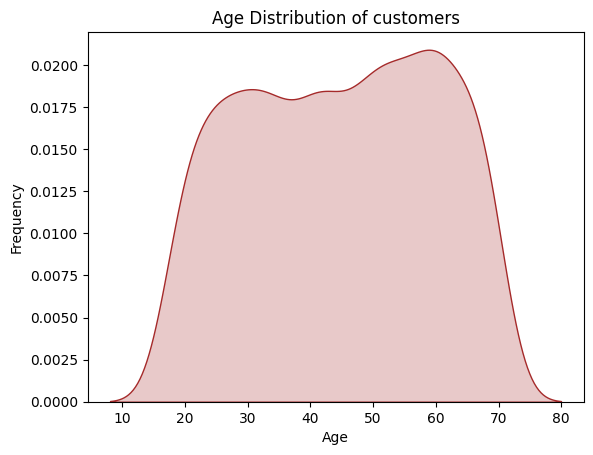

In [183]:
sns.kdeplot(df['Age'],fill=True,color='brown')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of customers')
plt.show()

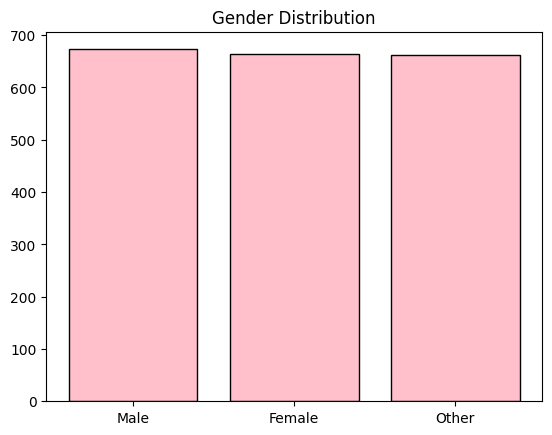

In [127]:
count=df['Gender'].value_counts()
plt.bar(count.index,count.values,color='pink',edgecolor='black')
plt.title('Gender Distribution')
plt.show()

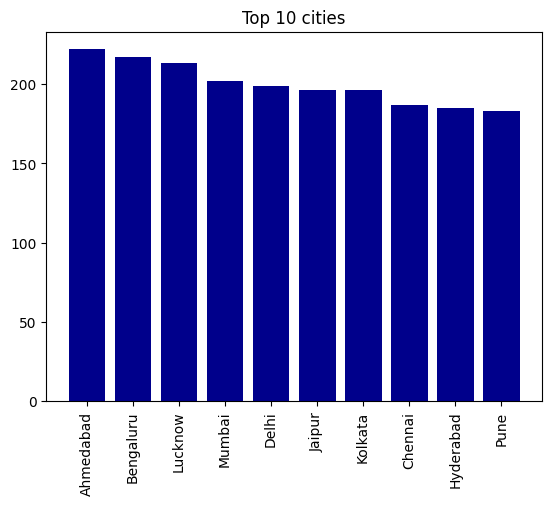

In [128]:
count=df['City'].value_counts().head(10)
plt.bar(count.index,count.values,color='darkblue')
plt.xticks(rotation=90)
plt.title('Top 10 cities')
plt.show()

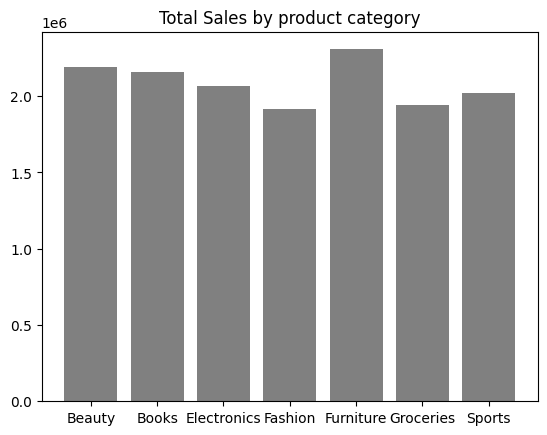

In [129]:
tot_sales=df.groupby('ProductCategory')['TotalAmount'].sum()
plt.bar(tot_sales.index,tot_sales.values,color='grey')
plt.title('Total Sales by product category')
plt.show()

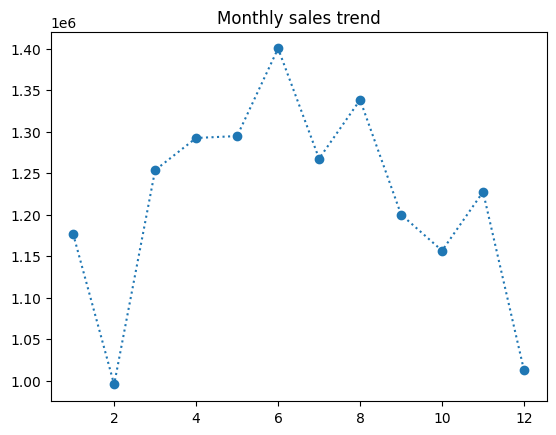

In [132]:
monthly_sales_trend=df.groupby('Month')['TotalAmount'].sum()
plt.plot(monthly_sales_trend.index,monthly_sales_trend.values,marker='o',linestyle=':')
plt.title('Monthly sales trend')
plt.show()

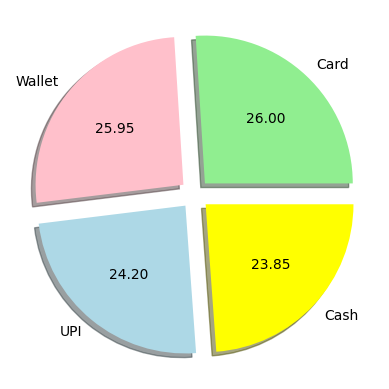

In [161]:
count=df['PaymentMode'].value_counts()
plt.pie(count,labels=count.index,colors=['lightgreen','pink','lightblue','yellow'],autopct='%1.2f',shadow=True,explode=[0.1,0.1,0.1,0.1])
plt.show()

C:\Users\subik\AppData\Local\Temp\ipykernel_24904\3964098567.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend=df.groupby('Agegroup')['TotalAmount'].sum()


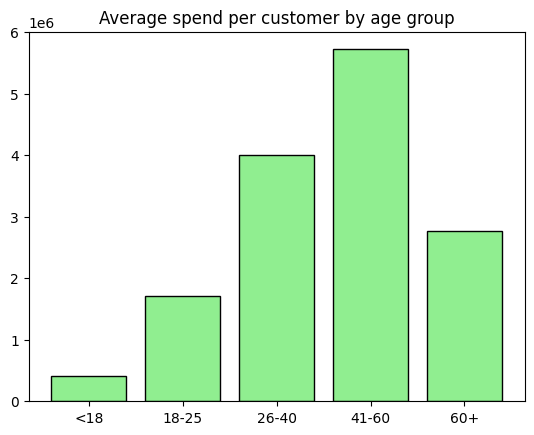

In [168]:
avg_spend=df.groupby('Agegroup')['TotalAmount'].sum()
plt.bar(avg_spend.index,avg_spend.values,color='lightgreen',edgecolor='black')
plt.title('Average spend per customer by age group')
plt.show()

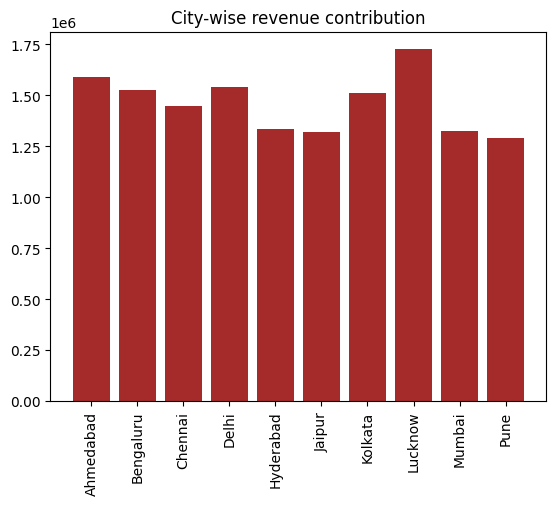

In [170]:
city_wise=df.groupby('City')['TotalAmount'].sum()
plt.bar(city_wise.index,city_wise.values,color='brown')
plt.title('City-wise revenue contribution')
plt.xticks(rotation=90)
plt.show()

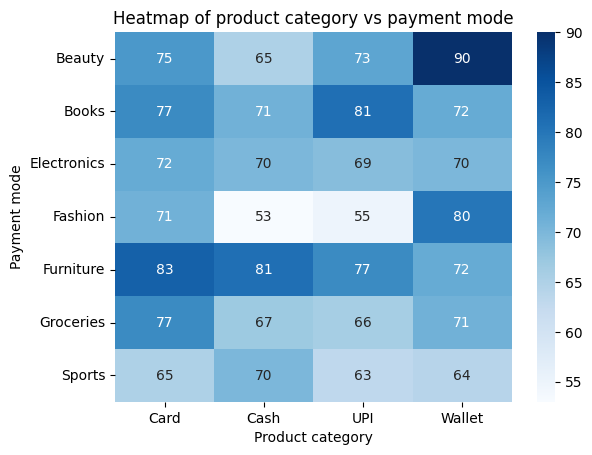

In [182]:
data=pd.crosstab(df['ProductCategory'],df['PaymentMode'])
sns.heatmap(data,annot=True,cmap='Blues')
plt.xlabel('Product category')
plt.ylabel('Payment mode')
plt.title('Heatmap of product category vs payment mode')
plt.show()

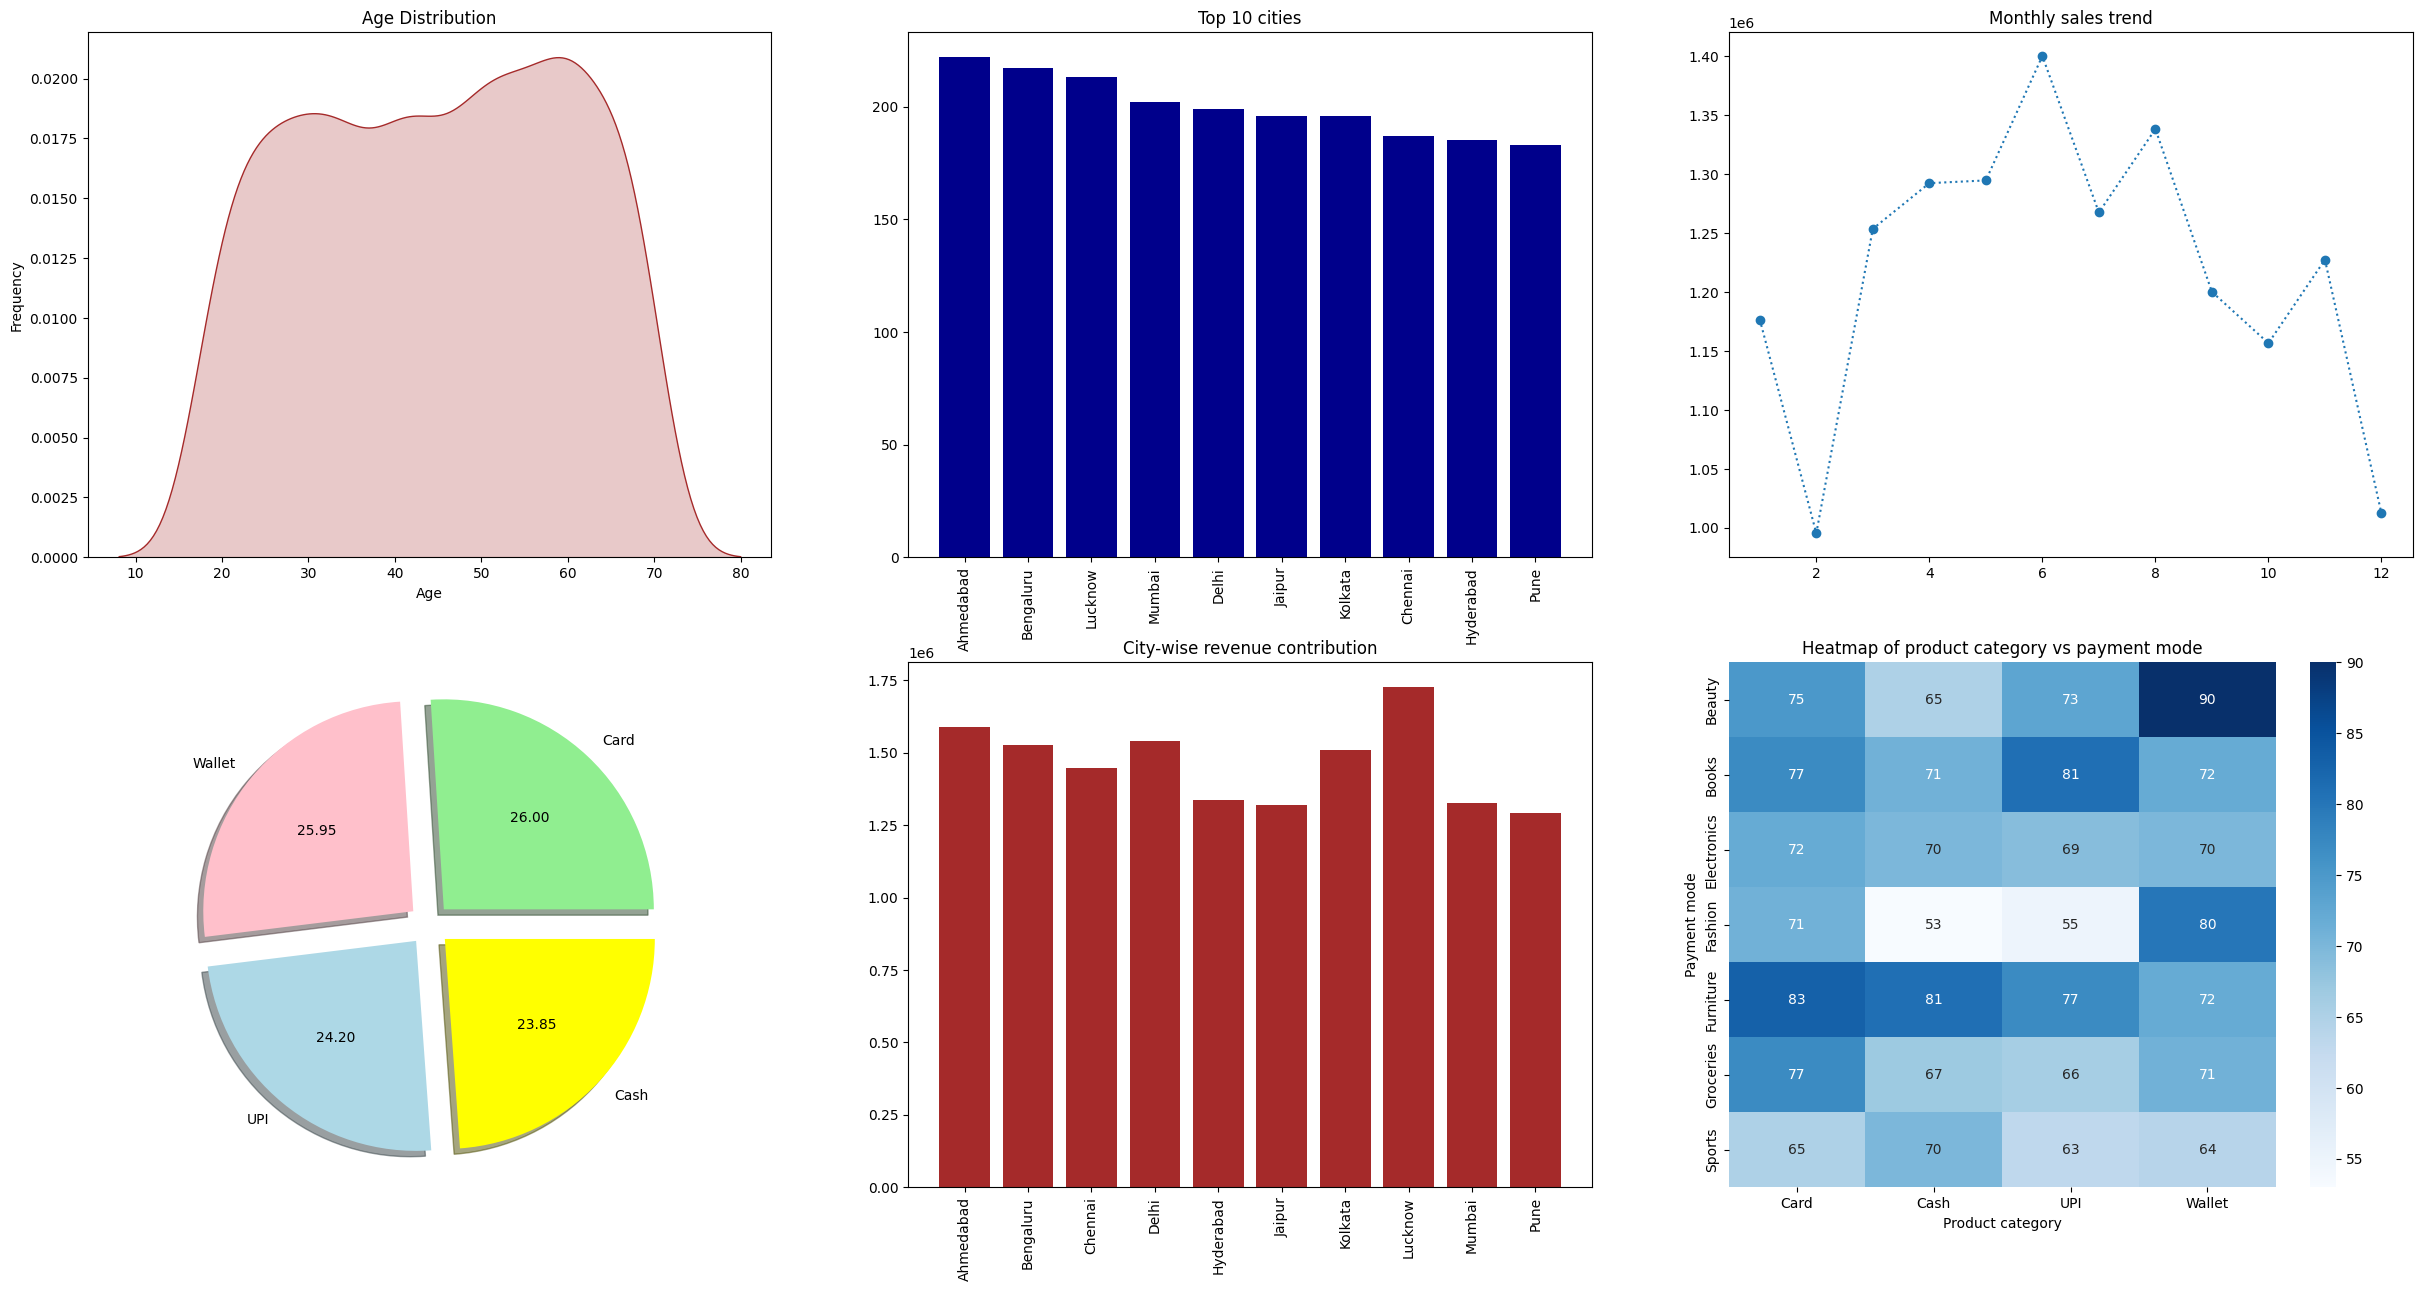

In [189]:
fig,axs=plt.subplots(2,3,figsize=(30,15))
sns.kdeplot(df['Age'],fill=True,color='brown',ax=axs[0,0])
axs[0,0].set_title('Age Distribution')
axs[0,0].set_xlabel('Age')
axs[0,0].set_ylabel('Frequency')

count=df['City'].value_counts().head(10)
axs[0,1].bar(count.index,count.values,color='darkblue')
axs[0,1].tick_params(axis='x',rotation=90)
axs[0,1].set_title('Top 10 cities')

monthly_sales_trend=df.groupby('Month')['TotalAmount'].sum()
axs[0,2].plot(monthly_sales_trend.index,monthly_sales_trend.values,marker='o',linestyle=':')
axs[0,2].set_title('Monthly sales trend')

count=df['PaymentMode'].value_counts()
axs[1,0].pie(count,labels=count.index,colors=['lightgreen','pink','lightblue','yellow'],autopct='%1.2f',shadow=True,explode=[0.1,0.1,0.1,0.1])

city_wise=df.groupby('City')['TotalAmount'].sum()
axs[1,1].bar(city_wise.index,city_wise.values,color='brown')
axs[1,1].set_title('City-wise revenue contribution')
axs[1,1].tick_params(axis='x',rotation=90)

data=pd.crosstab(df['ProductCategory'],df['PaymentMode'])
sns.heatmap(data,annot=True,cmap='Blues',ax=axs[1,2])
axs[1,2].set_xlabel('Product category')
axs[1,2].set_ylabel('Payment mode')
axs[1,2].set_title('Heatmap of product category vs payment mode')

plt.show()
